###### Import all the necessary libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

###### Import the dataset

In [57]:
data=pd.read_csv('titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.shape 


(891, 12)

In [6]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
data['Pclass'].nunique()

3

In [8]:
#statistics of data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

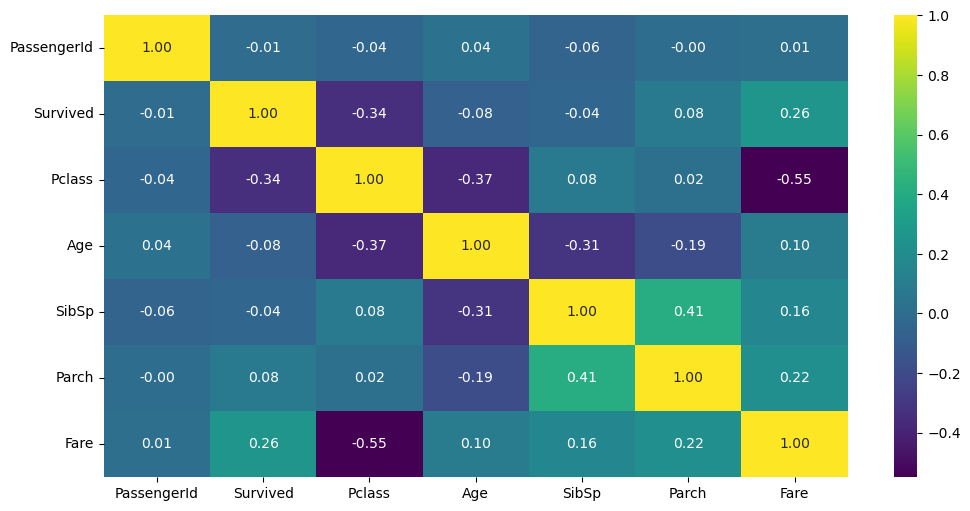

In [9]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(), cmap='viridis', annot=True, fmt='.2f')

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Data visualisation

In [45]:
def bar_chart(feature):
    survived = data[data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


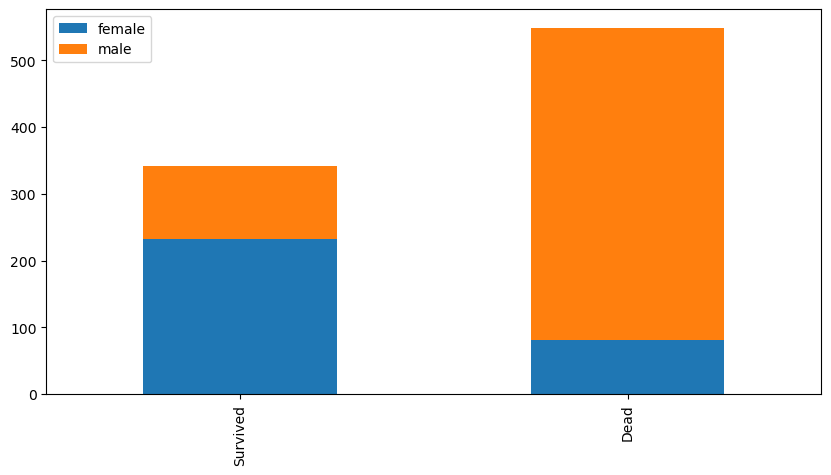

In [46]:
bar_chart('Sex')
print("Survived :\n",data[data['Survived']==1]['Sex'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Sex'].value_counts())

The Chart confirms Women more likely survivied than Men.

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


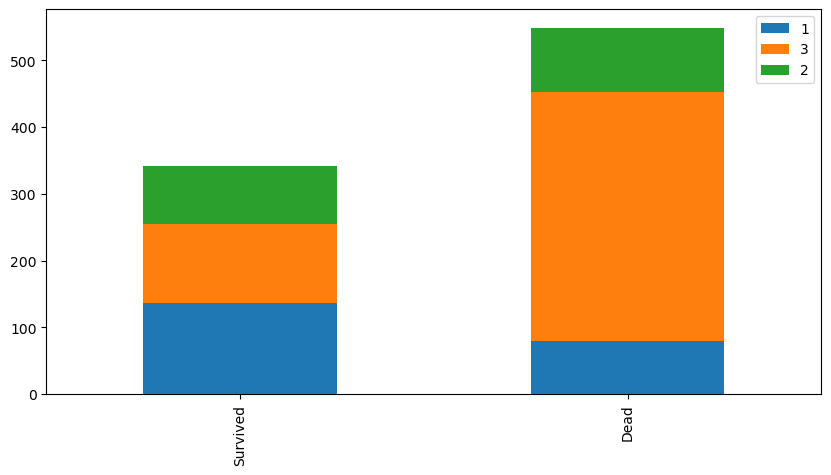

In [47]:
bar_chart('Pclass')
print("Survived :\n",data[data['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Pclass'].value_counts())

The Chart confirms 1st class more likely survivied than other classes.

The Chart confirms 3rd class more likely dead than other classes

Survived :
 0    217
1    112
2     13
Name: SibSp, dtype: int64
Dead:
 0    437
1     97
2     15
Name: SibSp, dtype: int64


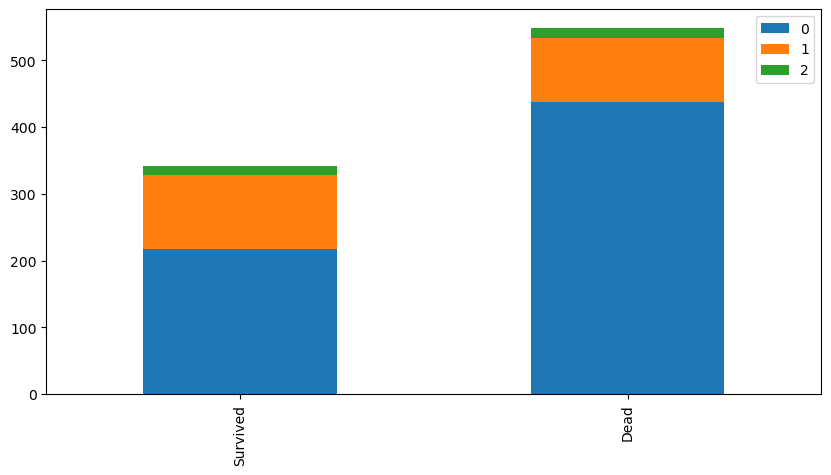

In [48]:
bar_chart('SibSp')
print("Survived :\n",data[data['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",data[data['Survived']==0]['SibSp'].value_counts())

The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived.

The Chart confirms a person aboarded without siblings or spouse more likely dead

Survived :
 0    342
Name: Parch, dtype: int64
Dead:
 0    549
Name: Parch, dtype: int64


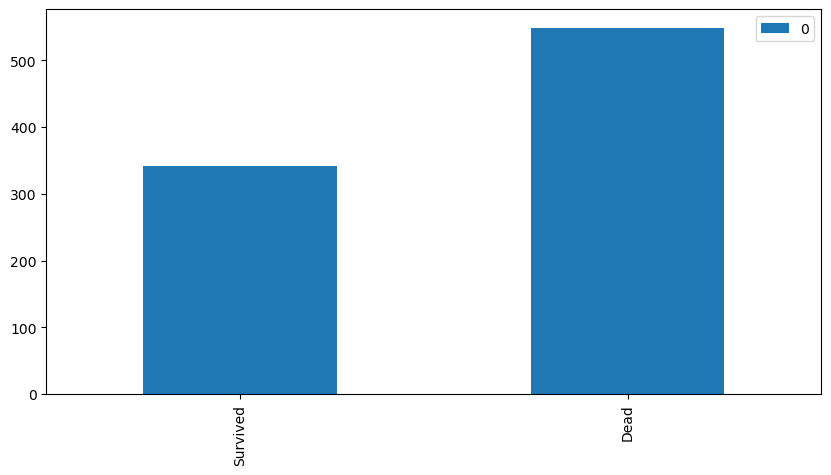

In [50]:
bar_chart('Parch')
print("Survived :\n",data[data['Survived']==1]['Parch'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Parch'].value_counts())


Survived :
 S    219
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


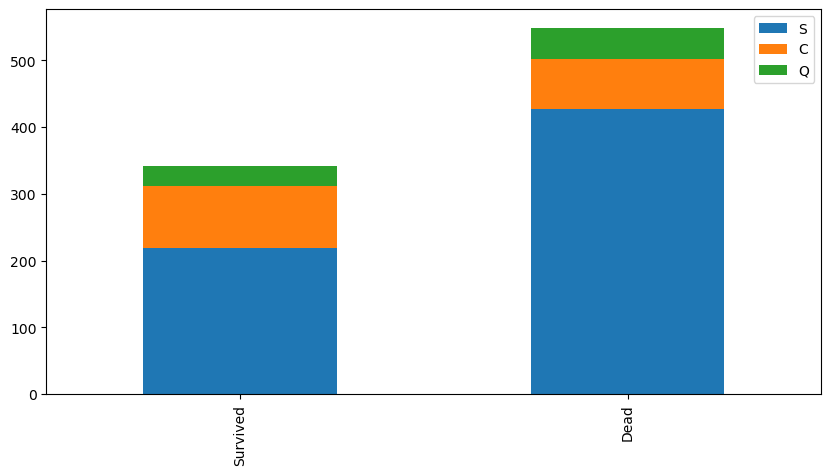

In [51]:
bar_chart('Embarked')
print("Survived :\n",data[data['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Embarked'].value_counts())

The Chart confirms a person aboarded from C slightly more likely survived.

The Chart confirms a person aboarded from Q more likely dead.

The Chart confirms a person aboarded from S more likely dead.

###### Data Preprocessing

In [58]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [59]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [16]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

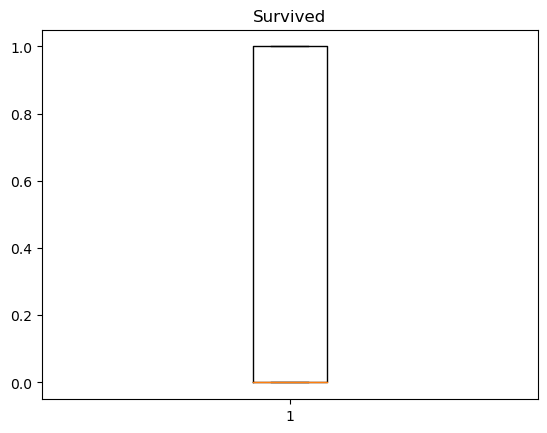

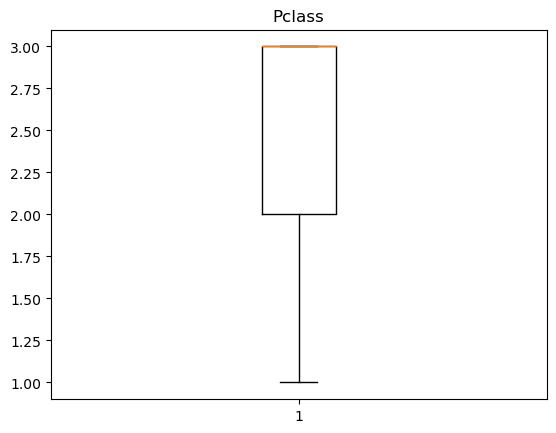

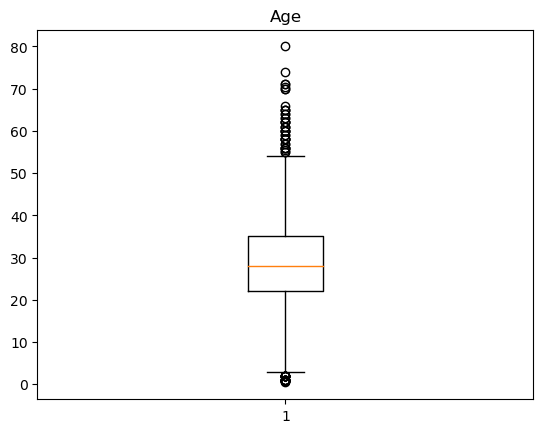

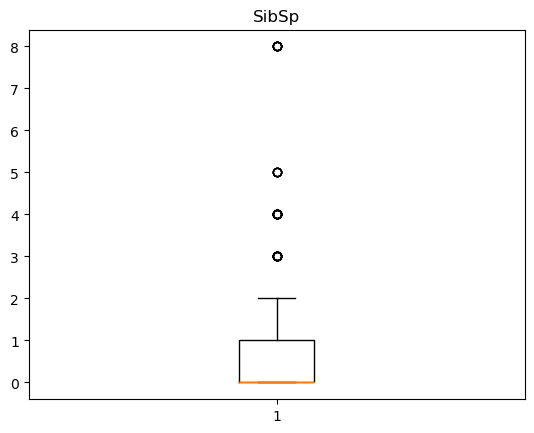

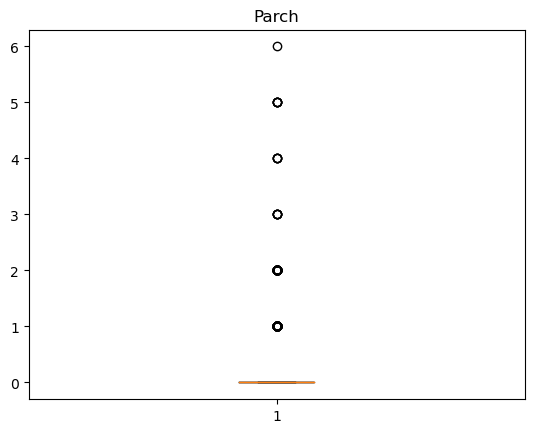

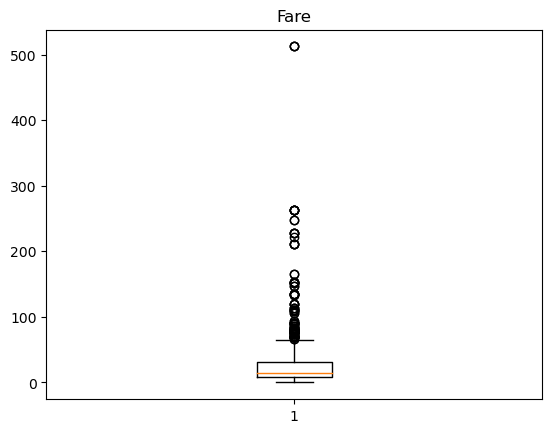

In [17]:
for i in ['Survived', 'Pclass','Age','SibSp','Parch','Fare']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [60]:
# Age,SibSp,Parch,Fare
IQR=stats.iqr(data.Age,interpolation='midpoint')
IQR

13.0

In [61]:
Q1=data.Age.quantile(0.25)
Q3=data.Age.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(2.5, 54.5)

In [62]:
data.loc[data.Age>max_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,B96 B98,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,B96 B98,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,B96 B98,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,B96 B98,Q
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,B96 B98,S
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C


In [63]:
data.loc[data.Age<min_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,B96 B98,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,B96 B98,Q
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,B96 B98,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,B96 B98,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,B96 B98,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,B96 B98,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


In [64]:
data.loc[data['Age']>max_limit,'Age']=np.median(data.Age)

In [65]:
data.loc[data.Age>max_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [66]:
data.loc[data['Age']<min_limit,'Age']=np.median(data.Age)

In [67]:
data.loc[data.Age<min_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [68]:
IQR=stats.iqr(data.SibSp,interpolation='midpoint')
print(IQR)
Q1=data.SibSp.quantile(0.25)
Q3=data.SibSp.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

1.0


(-1.5, 2.5)

In [69]:
data.loc[data.SibSp>max_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,28.0,3,1,349909,21.0750,B96 B98,S
16,17,0,3,"Rice, Master. Eugene",male,28.0,4,1,382652,29.1250,B96 B98,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,B96 B98,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,B96 B98,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,B96 B98,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,B96 B98,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,B96 B98,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,B96 B98,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,B96 B98,S


In [73]:
data.loc[data.SibSp<min_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [75]:
data.loc[data['SibSp']>max_limit,'SibSp']=np.median(data.SibSp)

In [76]:
data.loc[data.SibSp>max_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [77]:
IQR=stats.iqr(data.Parch,interpolation='midpoint')
print(IQR)
Q1=data.Parch.quantile(0.25)
Q3=data.Parch.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

0.0


(0.0, 0.0)

In [78]:
data.loc[data.Parch>max_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,28.0,0,1,349909,21.0750,B96 B98,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,B96 B98,S
16,17,0,3,"Rice, Master. Eugene",male,28.0,0,1,382652,29.1250,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,28.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,B96 B98,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,B96 B98,Q


In [35]:
data.loc[data.Parch<min_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [79]:
data.loc[data['Parch']>max_limit,'Parch']=np.median(data.Parch)

In [80]:
data.loc[data.Parch>max_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [81]:
IQR=stats.iqr(data.Fare,interpolation='midpoint')
print(IQR)
Q1=data.Fare.quantile(0.25)
Q3=data.Fare.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

23.0896


(-26.724, 65.6344)

In [82]:
data.loc[data.Fare>max_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,0,0,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,B96 B98,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,0,0,CA. 2343,69.5500,B96 B98,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28.0,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,0,36928,164.8667,B96 B98,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,0,0,CA. 2343,69.5500,B96 B98,S


In [40]:
data.loc[data.Fare<min_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [83]:
data.loc[data['Fare']>max_limit,'Fare']=np.median(data.Fare)

In [84]:
data.loc[data.Fare>max_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#Encoding

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
le=LabelEncoder()
data['Name']=le.fit_transform(data['Name'])
data['Ticket']=le.fit_transform(data['Ticket'])
data['Cabin']=le.fit_transform(data['Cabin'])
data['Embarked']=le.fit_transform(data['Embarked'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,male,22.0,1,0,523,7.2500,47,2
1,2,1,1,190,female,38.0,1,0,596,14.4542,81,0
2,3,1,3,353,female,26.0,0,0,669,7.9250,47,2
3,4,1,1,272,female,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,male,35.0,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,male,27.0,0,0,101,13.0000,47,2
887,888,1,1,303,female,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,female,28.0,1,0,675,23.4500,47,2
889,890,1,1,81,male,26.0,0,0,8,30.0000,60,0


In [87]:
data['Sex']= pd.get_dummies(data['Sex'],drop_first=True)

In [88]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,47,2
1,2,1,1,190,0,38.0,1,0,596,14.4542,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,47,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,47,2


Splitting Data

In [90]:
x=data.drop(['PassengerId','Survived','Ticket','SibSp','Parch'],axis=1)
y=data['Survived']

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2 )

Modelling

SVM

In [144]:
svm_cls = SVC(kernel ='linear')
svm_cls = svm_cls.fit(x_train,y_train)
y_pred_svm = svm_cls.predict(x_test)

In [93]:
confusion_matrix(y_test,y_pred_svm)

array([[88, 17],
       [22, 52]], dtype=int64)

In [94]:
accuracy_score(y_test,y_pred_svm)

0.7821229050279329

Cross Validation 

Kfold

In [95]:
kfold_validator = KFold(10)
for train_index,test_index in kfold_validator.split(x,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [100]:
cv_result = cross_val_score(svm_cls,x,y,cv = kfold_validator)

In [99]:
cv_result

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [101]:
np.mean(cv_result)

0.786729088639201

Stratified

In [102]:
skfold_validator = StratifiedKFold(n_splits = 10)

In [103]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [133]:
cv_result = cross_val_score(svm_cls,x,y,cv = skfold_validator)

In [136]:
cv_result

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [137]:
np.mean(cv_result)

0.786729088639201

#KNN

In [107]:
print(x_train.shape)
print(x_test.shape)

(712, 7)
(179, 7)


In [108]:
print(y_train.shape)
print(y_test.shape)

(712,)
(179,)


In [118]:
#Finding the optimum value of k
metric_k = []
neighbors = np.arange(1,50)

In [119]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_predictions = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [120]:
metric_k

[0.6201117318435754,
 0.5977653631284916,
 0.5810055865921788,
 0.6089385474860335,
 0.5977653631284916,
 0.6256983240223464,
 0.6312849162011173,
 0.6536312849162011,
 0.6480446927374302,
 0.6536312849162011,
 0.6368715083798883,
 0.6201117318435754,
 0.6424581005586593,
 0.6201117318435754,
 0.6256983240223464,
 0.5977653631284916,
 0.6256983240223464,
 0.6145251396648045,
 0.6368715083798883,
 0.6033519553072626,
 0.6201117318435754,
 0.6089385474860335,
 0.6033519553072626,
 0.5977653631284916,
 0.5977653631284916,
 0.5921787709497207,
 0.5977653631284916,
 0.5865921787709497,
 0.5977653631284916,
 0.5865921787709497,
 0.5921787709497207,
 0.5865921787709497,
 0.5977653631284916,
 0.5865921787709497,
 0.5921787709497207,
 0.5810055865921788,
 0.5810055865921788,
 0.5865921787709497,
 0.5865921787709497,
 0.5865921787709497,
 0.5865921787709497,
 0.5865921787709497,
 0.5865921787709497,
 0.5865921787709497,
 0.5865921787709497,
 0.5865921787709497,
 0.5865921787709497,
 0.5865921787

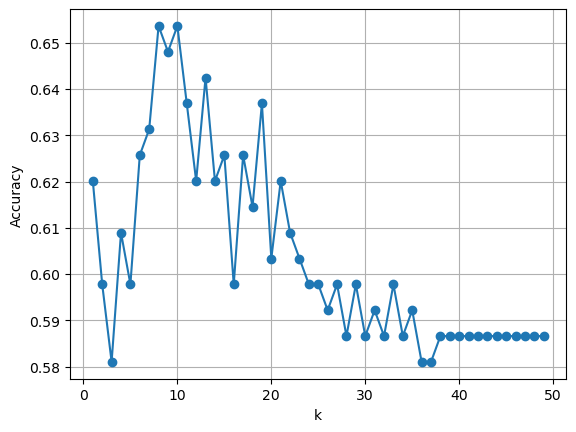

In [121]:
#plot the relationship between K and the testing accuracy
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [126]:
classifier = KNeighborsClassifier(n_neighbors = 10,metric = 'euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

In [127]:
print('Accuracy =',accuracy_score(y_test,y_predictions))
print('Precision =',precision_score(y_test,y_predictions,average='micro'))
print('Recall =',recall_score(y_test,y_predictions,average='micro'))
print('F1 Score =',f1_score(y_test,y_predictions,average='micro'))


Accuracy = 0.6536312849162011
Precision = 0.6536312849162011
Recall = 0.6536312849162011
F1 Score = 0.6536312849162011


In [128]:
confusion_matrix(y_test,y_predictions)

array([[100,   5],
       [ 57,  17]], dtype=int64)

Cross Validation -Kfold and Stratified

In [130]:
cv_result1 = cross_val_score(classifier,x,y,cv = kfold_validator)

In [131]:
cv_result1

array([0.55555556, 0.76404494, 0.68539326, 0.58426966, 0.64044944,
       0.65168539, 0.59550562, 0.66292135, 0.60674157, 0.6741573 ])

In [132]:
np.mean(cv_result1)

0.6420724094881398

In [139]:
cv_result1 = cross_val_score(classifier,x,y,cv = skfold_validator)

In [142]:
cv_result1

array([0.58888889, 0.66292135, 0.68539326, 0.65168539, 0.66292135,
       0.62921348, 0.62921348, 0.66292135, 0.65168539, 0.64044944])

In [143]:
np.mean(cv_result1)

0.6465293383270911

###### Conclusion

###### In both the models, SVM is better than KNN as the accuracy is more in SVM.